# Data: Process and Plot Annual Maximums

The annual maximum, daily precipitation depth was extracted for each simulated year for weighted average daily values that represent the daily mean areal precipitation across the watershed. For PRISM there is only one watershed time series. For LOCA there are 64 models and so there are 64 area-averaged time series.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Events'
PRISM_IN = "PRISM_Annual_Totals_1981-2010_npa.pickle"
LOCA_DP_IN = "LOCA_Annual_Totals_1981-2010_npa.pickle"
LOCA_P1_IN = "LOCA_Annual_Totals_2011-2040_npa.pickle"
LOCA_P2_IN = "LOCA_Annual_Totals_2041-2070_npa.pickle"
LOCA_P3_IN = "LOCA_Annual_Totals_2071-2100_npa.pickle"

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

## Import PRISM

In [5]:
InFiler = os.path.normpath( os.path.join( IN_DIR, PRISM_IN ) )
with open( InFiler, 'rb' ) as IP:
    npPAnn = pickle.load( IP )
# end with

In [6]:
npPAnn.shape

(30,)

In [7]:
npPAnn.min(), npPAnn.max()

(337.14694, 1154.6359)

## Import LOCA

### Data Period

In [8]:
InFiler = os.path.normpath( os.path.join( IN_DIR, LOCA_DP_IN ) )
with open( InFiler, 'rb' ) as IP:
    LOCA_DP = pickle.load( IP )
# end with
LOCA_DP.shape

(1920,)

In [9]:
LOCA_DP.min(), LOCA_DP.max()

(145.73724, 1329.0289)

### Project Period 1

In [10]:
InFiler = os.path.normpath( os.path.join( IN_DIR, LOCA_P1_IN ) )
with open( InFiler, 'rb' ) as IP:
    LOCA_P1 = pickle.load( IP )
# end with
LOCA_P1.shape

(1920,)

In [11]:
LOCA_P1.min(), LOCA_P1.max()

(111.923355, 1256.4879)

### Project Period 2

In [12]:
InFiler = os.path.normpath( os.path.join( IN_DIR, LOCA_P2_IN ) )
with open( InFiler, 'rb' ) as IP:
    LOCA_P2 = pickle.load( IP )
# end with
LOCA_P2.shape

(1920,)

In [13]:
LOCA_P2.min(), LOCA_P2.max()

(102.445724, 1369.5848)

### Project Period 3

In [14]:
InFiler = os.path.normpath( os.path.join( IN_DIR, LOCA_P3_IN ) )
with open( InFiler, 'rb' ) as IP:
    LOCA_P3 = pickle.load( IP )
# end with
LOCA_P3.shape

(1856,)

In [15]:
type( LOCA_P3 )

numpy.ndarray

In [16]:
tLOCA_P3 = LOCA_P3[ LOCA_P3 >= 0 ]

In [17]:
tLOCA_P3.min(), tLOCA_P3.max()

(93.064995, 1234.8926)

In [18]:
LOCA_P3.min(), LOCA_P3.max()

(-9450.253, 1234.8926)

## Plots

For this example, use one plot with 4 split violins. Each violin corresponds to one analysis interval.

In [19]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

#### Make DataFrame for Split Violin

In [20]:
NumPRISM = npPAnn.shape[0]
NumPRISM

30

In [21]:
NumDP_LOCA = LOCA_DP.shape[0]
NumDP_LOCA

1920

In [22]:
NumP1_LOCA = LOCA_P1.shape[0]
NumP1_LOCA

1920

In [23]:
NumP2_LOCA = LOCA_P2.shape[0]
NumP2_LOCA

1920

In [24]:
NumP3_LOCA = tLOCA_P3.shape[0]
NumP3_LOCA

1855

In [25]:
PRISM_Labels = [ "PRISM 1981-2010" for x in range( NumPRISM ) ]
LOCA_DP_Labels = [ "LOCA" for x in range( NumDP_LOCA ) ]
LOCA_P1_Labels = [ "LOCA" for x in range( NumP1_LOCA ) ]
LOCA_P2_Labels = [ "LOCA" for x in range( NumP2_LOCA ) ]
LOCA_P3_Labels = [ "LOCA" for x in range( NumP3_LOCA ) ]

In [26]:
AllLabels = deepcopy( PRISM_Labels )
AllLabels.extend( LOCA_DP_Labels )
AllLabels.extend( PRISM_Labels )
AllLabels.extend( LOCA_P1_Labels )
AllLabels.extend( PRISM_Labels )
AllLabels.extend( LOCA_P2_Labels )
AllLabels.extend( PRISM_Labels )
AllLabels.extend( LOCA_P3_Labels )
DPTotLen = len( AllLabels )
DPTotLen

7735

In [27]:
Interval_PRISM_DP = [ "1981-2010" for x in range( NumPRISM ) ]
Interval_PRISM_P1 = [ "2011-2040" for x in range( NumPRISM ) ] 
Interval_PRISM_P2 = [ "2041-2070" for x in range( NumPRISM ) ] 
Interval_PRISM_P3 = [ "2071-2099" for x in range( NumPRISM ) ]
Interval_LOCA_DP = [ "1981-2010" for x in range( NumDP_LOCA ) ]
Interval_LOCA_P1 = [ "2011-2040" for x in range( NumP1_LOCA ) ] 
Interval_LOCA_P2 = [ "2041-2070" for x in range( NumP2_LOCA ) ] 
Interval_LOCA_P3 = [ "2071-2099" for x in range( NumP3_LOCA ) ] 

In [28]:
AllIntervals = deepcopy( Interval_PRISM_DP )
AllIntervals.extend( Interval_LOCA_DP )
AllIntervals.extend( Interval_PRISM_P1 )
AllIntervals.extend( Interval_LOCA_P1 )
AllIntervals.extend( Interval_PRISM_P2 )
AllIntervals.extend( Interval_LOCA_P2 )
AllIntervals.extend( Interval_PRISM_P3 )
AllIntervals.extend( Interval_LOCA_P3 )

In [29]:
#AllValues = np.concatenate( [ npPAnn, LOCA_DP, npPAnn, LOCA_P1, npPAnn, LOCA_P2 ], axis=0 )
AllValues = np.concatenate( [ npPAnn, LOCA_DP, npPAnn, LOCA_P1, npPAnn, LOCA_P2, npPAnn, tLOCA_P3 ], axis=0 )
AllValues.shape

(7735,)

In [30]:
DataDict = { "Interval" :AllIntervals,
             "DLabel" : AllLabels,
             "AnnTot" : AllValues, }
DPDF = pd.DataFrame( data=DataDict )

In [31]:
preTicks = [ 80.0, 100.0, 500.0, 1000.0, 1500.0, 2000.0 ]

#### Box

In [32]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnTotal_BW_1981-2010.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\AnnTotal_BW_1981-2010.svg'

In [33]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "AnnTotal_BW_1981-2010.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\AnnTotal_BW_1981-2010.png'

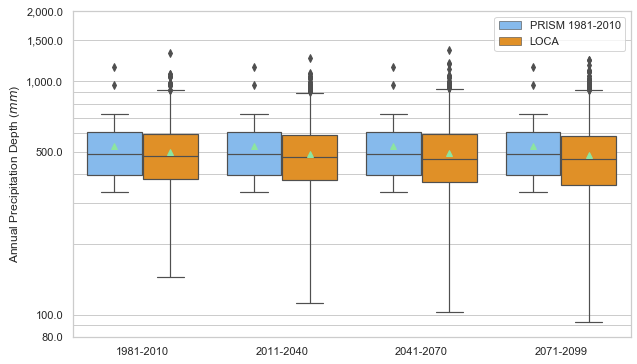

In [34]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
g1 = sns.boxplot( x="Interval", y="AnnTot", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v", showmeans=True,
                palette={ "PRISM 1981-2010" : "xkcd:sky blue", 
                          "LOCA" : "xkcd:tangerine" },
                data=DPDF, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="upper right")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Annual Precipitation Depth ($mm$)', fontsize=12)
g1.set_ylim( ( 80.0, 2000.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )